In [4]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [5]:
# neural net class
class neuralNetwork:

    # initialize neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # configure input, hidden and output nodes of network
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes

        # link nodes
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)

        # configure learning rate of network
        self.lr = learning_rate

        # configure activation function
        self.activation_function = lambda x: scipy.special.expit(x)

    # train neural net
    def train(self, inputs_list, targets_list):
        # converts inputs list to 2d arr
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate signals from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate signals from output layer
        final_outputs = self.activation_function(final_inputs)

        # calculate the error (target - actual)
        output_errors = targets - final_outputs

        # calculate back propagated errors for hidden layer nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update weights for links between hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs *
                                         (1.0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))

        # update weights for links between input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs *
                                         (1.0 - hidden_outputs)),
                                        numpy.transpose(inputs))

    # query neural net (gives answer from output nodes)
    def query(self, input_list):
        # converts inputs list to 2d arr
        inputs = numpy.array(input_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate signals from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate signals from output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs



    # gives info about the neural net
    def print_info(self):
        print(self.inodes)

In [11]:
# create network
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [31]:
# open and read file
file = open("data/mnist_train.csv", 'r')
train_data_list = file.readlines()
file.close()

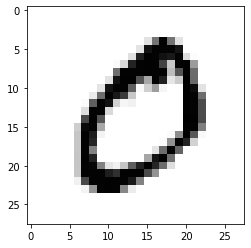

In [25]:
# check dataset
all_values = train_data_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [32]:
# train network

# num of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # loop thru records in training data set
    for record in train_data_list:
        # split values
        all_values = record.split(',')
        # correct answer is first vall
        correct_label = int(all_values[0])
        # scale and shift inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create target output values
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label
        targets[int(all_values[0])] = 0.99
        nn.train(inputs, targets)
        pass
    pass

In [33]:
# test data
test_data_file = open('data/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [36]:
# test network

score = []

# loop thru test data
for record in test_data_list:
    # split commas
    all_values = record.split(',')
    # correct answer is first vall
    correct_label = int(all_values[0])
    # print(correct_label, ' = correct label')
    # scale and shift inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query network
    outputs = nn.query(inputs)
    # index of highest value corresponds to label
    label = numpy.argmax(outputs)
    # print(label, ' = neural nets answer')
    # append correct/incorrect to llis
    if label == correct_label:
        # add 1 to score if correct
        score.append(1)
    else:
        score.append(0)
        pass
    pass

print(score)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [37]:
# calculate peformance score
score_array = numpy.asarray(score)
print('peformance = ', score_array.sum() / score_array.size)

peformance =  0.9715
